### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [1]:
import pandas as pd

# Datos simulados
data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría del Producto': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Costo de envío': [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    'Fecha de Compra': ['16/01/2021', '18/05/2022', '15/03/2021', '03/05/2022', '07/11/2020'],
    'Vendedor': ['Pedro Gomez', 'Beatriz Morales', 'Juan Fernandez', 'Juan Fernandez', 'Maria Alfonso'],
    'Lugar de Compra': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Calificación': [4, 1, 1, 4, 5],
    'Método de pago': ['Tarjeta de crédito', 'Tarjeta de crédito', 'Tarjeta de crédito', 'Nequi', 'Nequi'],
    'Cantidad de cuotas': [8, 4, 1, 1, 1],
    'lat': [4.60971, 6.25184, 10.39972, 3.43722, 6.25184],
    'lon': [-74.08175, -75.56359, -75.51444, -76.52250, -75.56359]
}

#  DataFrame
df = pd.DataFrame(data)

# Calculo ingresos totales por tienda
ingresos_por_tienda = df.groupby("Lugar de Compra")["Precio"].sum().reset_index()

#  resultado
print(ingresos_por_tienda)


  Lugar de Compra    Precio
0          Bogotá  164300.0
1            Cali  757500.0
2       Cartagena  209600.0
3        Medellín  527500.0


# 2. Ventas por categoría

In [2]:
# Agrupar por tienda y categoría y contar cantidad de ventas
ventas_por_categoria = df.groupby(["Lugar de Compra", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")

# Ordenar por tienda y por cantidad descendente
ventas_ordenadas = ventas_por_categoria.sort_values(by=["Lugar de Compra", "Cantidad de Ventas"], ascending=[True, False])

print(ventas_ordenadas)


  Lugar de Compra Categoría del Producto  Cantidad de Ventas
0          Bogotá           Electrónicos                   1
1            Cali      Electrodomésticos                   1
2       Cartagena               Juguetes                   1
3        Medellín                Muebles                   2


# 3. Calificación promedio de la tienda


In [3]:
# Calcular calificación promedio por tienda
valoracion_promedio = df.groupby("Lugar de Compra")["Calificación"].mean().reset_index()

# Redondear a 2 decimales para mejor presentación
valoracion_promedio["Calificación"] = valoracion_promedio["Calificación"].round(2)

print(valoracion_promedio)


  Lugar de Compra  Calificación
0          Bogotá           4.0
1            Cali           4.0
2       Cartagena           1.0
3        Medellín           3.0


# 4. Productos más y menos vendidos

In [4]:
pip install matplotlib seaborn


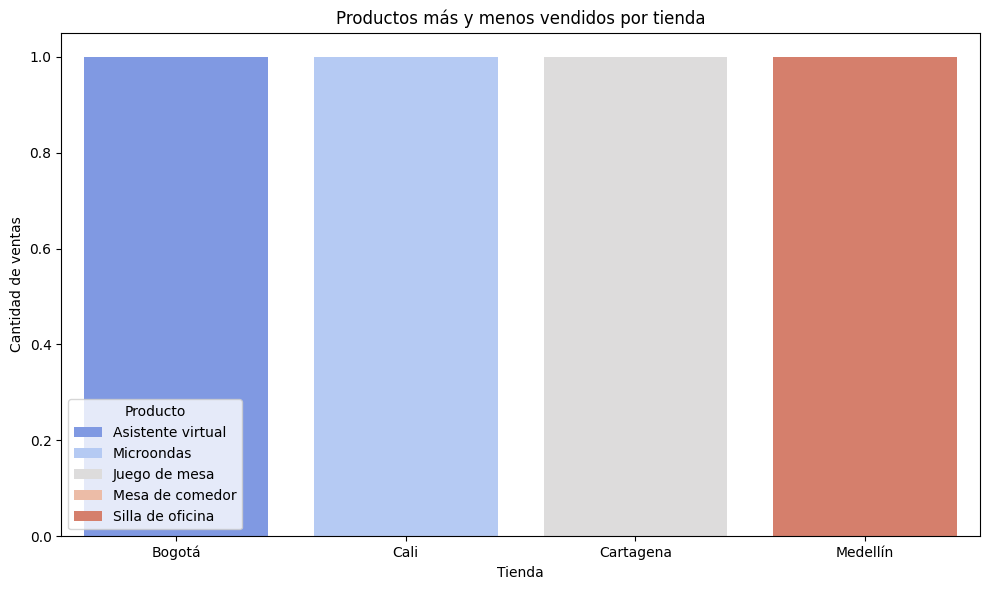

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Contar productos vendidos por tienda
ventas_producto = df.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Obtener producto más y menos vendido por tienda
productos_top = ventas_producto.sort_values(['Lugar de Compra', 'Cantidad de Ventas'], ascending=[True, False])
productos_max = productos_top.groupby('Lugar de Compra').first().reset_index()
productos_min = productos_top.groupby('Lugar de Compra').last().reset_index()

# Concatenar para visualización
productos_extremos = pd.concat([
    productos_max.assign(Tipo='Más vendido'),
    productos_min.assign(Tipo='Menos vendido')
])

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x='Lugar de Compra', y='Cantidad de Ventas', hue='Producto', data=productos_extremos, palette='coolwarm', dodge=False)
plt.title('Productos más y menos vendidos por tienda')
plt.ylabel('Cantidad de ventas')
plt.xlabel('Tienda')
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd



# Contar cuántas veces se vendió cada producto por tienda
ventas_producto = df.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Ordenar para encontrar el más y el menos vendido por tienda
productos_ordenados = ventas_producto.sort_values(['Lugar de Compra', 'Cantidad de Ventas'], ascending=[True, False])

# Producto más vendido por tienda
productos_mas_vendidos = productos_ordenados.groupby('Lugar de Compra').first().reset_index()
productos_mas_vendidos['Tipo'] = 'Más vendido'

# Producto menos vendido por tienda
productos_menos_vendidos = productos_ordenados.groupby('Lugar de Compra').last().reset_index()
productos_menos_vendidos['Tipo'] = 'Menos vendido'

# Unir ambos resultados
productos_extremos = pd.concat([productos_mas_vendidos, productos_menos_vendidos])

# Mostrar resultados
print(productos_extremos[['Lugar de Compra', 'Producto', 'Cantidad de Ventas', 'Tipo']])


  Lugar de Compra           Producto  Cantidad de Ventas           Tipo
0          Bogotá  Asistente virtual                   1    Más vendido
1            Cali         Microondas                   1    Más vendido
2       Cartagena      Juego de mesa                   1    Más vendido
3        Medellín    Mesa de comedor                   1    Más vendido
0          Bogotá  Asistente virtual                   1  Menos vendido
1            Cali         Microondas                   1  Menos vendido
2       Cartagena      Juego de mesa                   1  Menos vendido
3        Medellín   Silla de oficina                   1  Menos vendido


# 5. Envío promedio por tienda

In [7]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio = df.groupby("Lugar de Compra")["Costo de envío"].mean().reset_index()

# Redondear a 2 decimales para mejor presentación
costo_envio_promedio["Costo de envío"] = costo_envio_promedio["Costo de envío"].round(2)

# Mostrar resultados
print(costo_envio_promedio)


  Lugar de Compra  Costo de envío
0          Bogotá          6900.0
1            Cali         41000.0
2       Cartagena         15900.0
3        Medellín         14300.0
